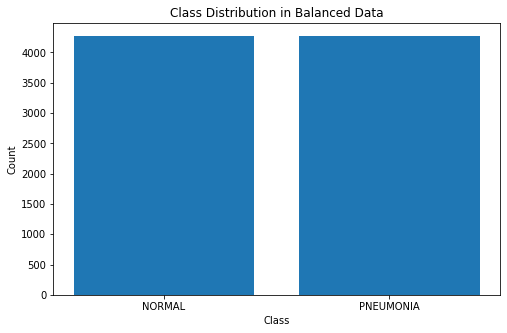

In [3]:
from imblearn.over_sampling import RandomOverSampler
import os
import numpy as np
import matplotlib.pyplot as plt

data_location = 'C:/Users/ASUS/Desktop/M2_SID/MFD/processed'
class_names = ['PNEUMONIA', 'NORMAL']
image_size = (128, 128)

X = []
y = []

for class_name in class_names:
    for data_split in ['train_gauss', 'test_gauss', 'val_gauss']:
        class_path = os.path.join(data_location, data_split, class_name)
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            X.append(image_path)  # Corrected to append image_path, not image
            y.append(class_name)
X = np.array(X)

oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X.reshape(-1, 1), y)  # Reshape X

unique_classes, counts = np.unique(y_resampled, return_counts=True)

plt.figure(figsize=(8, 5))
plt.bar(unique_classes, counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution in Balanced Data')
plt.show()